## Airbnb Part 3 - Principal Component Analysis
This notebook will delve into applying PCA for Airbnb data.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

# Data sourced from Inside Airbnb (http://insideairbnb.com/get-the-data.html)
# A million thanks to Murray Cox
calendar = pd.read_csv("calendar.csv")
calendar2 = pd.read_csv("calendar2.csv")
listings = pd.read_csv("listings.csv")
listings2 = pd.read_csv("listings2.csv")
nhoods = pd.read_csv("neighbourhoods.csv")
reviews = pd.read_csv("reviews.csv")
reviews2 = pd.read_csv("reviews2.csv")

From the draft report, the useful fields were catagorized into listing attributes, host attributes, text descriptions, and ratings/reviews. As a first step, it seems intuitive to focus on the ratings data, to see if they can be compressed into less fields.

In [2]:
review_scores = ['review_scores_rating', 
                 'review_scores_accuracy',
                 'review_scores_cleanliness',
                 'review_scores_checkin',
                'review_scores_communication',
                'review_scores_location',
                'review_scores_value',
                'reviews_per_month']

#popularity = []

review_scores_set = listings2[['id'] + review_scores]

Upon observation, it appears that there are quite a number of NaNs for the reviews scores fields in the dataset. Time to remove them.

In [3]:
print len(review_scores_set)
review_scores_set = review_scores_set.dropna()
len(review_scores_set)

7029


5619

In [4]:
review_scores_set.head()

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1162609,89,9,9,10,10,9,9,0.28
2,6938818,92,9,9,10,9,9,9,2.33
4,4781448,100,10,10,10,10,10,10,0.36
5,1931937,94,9,9,10,10,9,9,1.13
6,2134100,92,10,9,10,9,9,9,6.09


In [5]:
review_scores_set.describe()

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000
mean,4047122.163196,93.781456,9.541555,9.366791,9.712048,9.742125,9.424987,9.230824,1.881595
std,2749074.967039,7.797632,0.823628,0.962730,0.696849,0.654331,0.846236,0.856115,1.749136
min,958.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.020000
25%,1455172.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.580000
50%,3907799.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.250000
75%,6657284.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.730000
max,9130137.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.520000


In [6]:
from sklearn.preprocessing import StandardScaler
ids = review_scores_set['id']
rs = review_scores_set[review_scores]
rs_std = StandardScaler().fit_transform(rs)

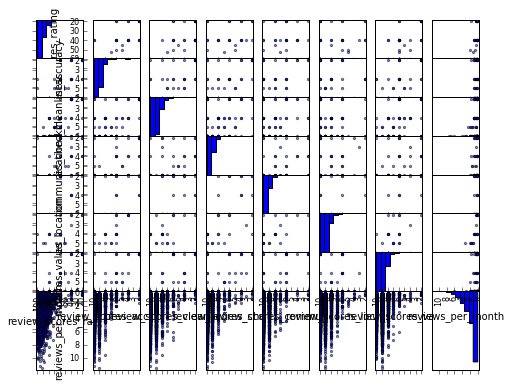

In [16]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(rs, alpha=0.5)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(rs_std)

In [8]:
Y_sklearn

array([[-0.65357321, -0.73671628],
       [-1.00393757,  0.33304463],
       [ 1.63647091, -0.97223622],
       ..., 
       [-1.64199512,  2.37401671],
       [ 0.65808402,  0.73010713],
       [-0.03488519,  0.78265264]])

In [9]:
Y_sklearn[:,0]

array([-0.65357321, -1.00393757,  1.63647091, ..., -1.64199512,
        0.65808402, -0.03488519])

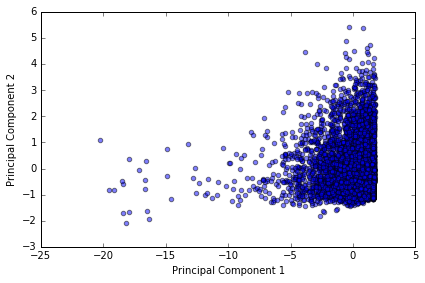

In [11]:
import matplotlib.pyplot as plt
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

With this, we are able to use PCA to condense the ratings related data into two components.